In [2]:
import cv2
import numpy as np
import torch
from collections import deque
from model.hogSvmModel import ASL_alphabet_hog_svm_classifier
from model.pipeline import charToWordProcessor
from model.pipeline import pipeline

## Model Path

In [3]:
MODEL_PATH = './pretrained/hog_svm/hog_svm_model_500.xml'

## Build model

In [5]:
#LOAD PRETRAINED MODEL
model = ASL_alphabet_hog_svm_classifier()
model.load_model( MODEL_PATH )
pip = pipeline(model)

C:\Users\25261\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Run Real Time ASL alphabet Spelling System 
- Check out the gesture of each alphabet in this poster
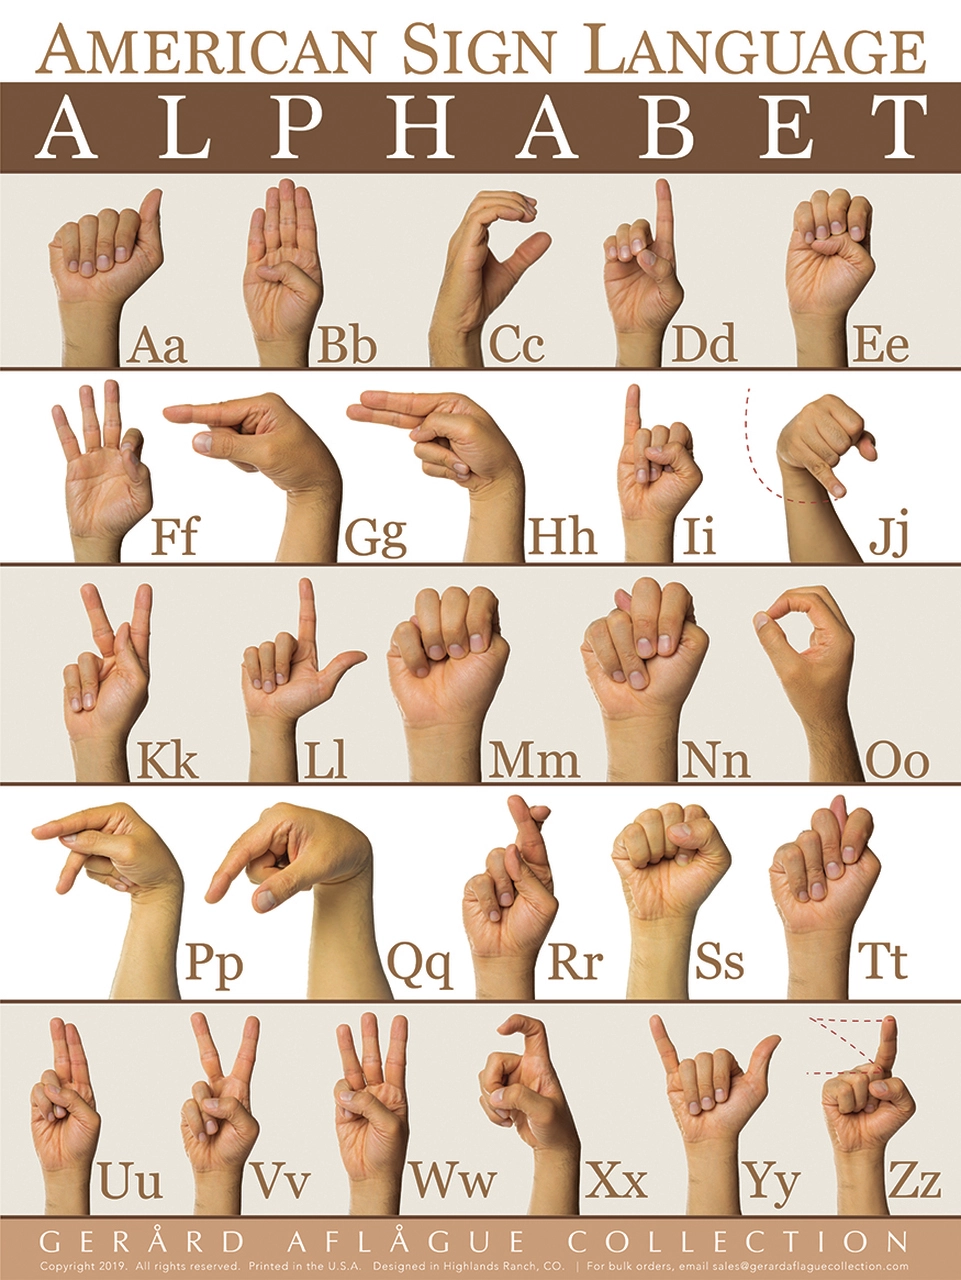
### two additional gestures
1.del: delete the previous character
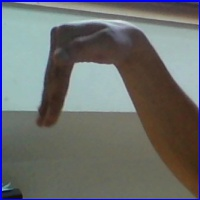
2.space: output a word once 'space' is entered
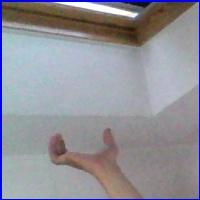
3. You can end this program by pressing 'q'

## Setup 
### How to determine distance_thresh (manual setup)
1. turn on the output of distance in the while loop by removing '#' 
2. Give stable / unstable input and observe the value of distance
3. modify distance_thresh below

#### Note:
1. stability_thresh: how many continuos frames is needed to be qualified as 'stable'
2. change of distance_thresh is necessary, but you don't have to change stability_thresh


In [6]:
distance_thresh = 12
stability_thresh = 50

In [7]:
video = cv2.VideoCapture(0)

if video.isOpened():
    print('webcam video success')
else:
    print('webcam video failed')

pip.processor.buf = deque()
exist, prev_frame = video.read()
size = prev_frame.shape[0]*prev_frame.shape[1]
now_frame = None
continuous_count = 0

while True:
    
    exist, now_frame = video.read()
    if exist:
        #distance = np.linalg.norm( now_frame - prev_frame )
        distance = ( cv2.absdiff( now_frame, prev_frame ).sum() )/size
        #print( 'distance = ', distance ) #used for determining distance_thresh in different environment and should be turned off after setup
        
        #(1) check frame difference
        if distance < distance_thresh:
            continuous_count += 1
        else: 
            continuous_count = 0
        
        #(2) check stability
        if continuous_count > stability_thresh:

            pip.one_step( now_frame )
            continuous_count = 0 #reset to 0
        
        #(3) mentainance & control
        cv2.imshow( 'webcam', now_frame )
        if ( cv2.waitKey(10) & 0xFF ) == ord('q'): #press 'q' to end this program
            print('Stopped')
            break
        prev_frame = now_frame
    
    else:
        break 

video.release()
cv2.destroyAllWindows()

webcam video success


AttributeError: 'SVC' object has no attribute 'probA_'